### AdaBoost Classifier
---
**Elo notes**

AdaBoost, short for "Adaptive Boosting", is a machine learning meta-algorithm. It can be used in conjunction with many other types of learning algorithms to improve their performance. The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers. AdaBoost is sensitive to noisy data and outliers. In some problems it can be less susceptible to the overfitting problem than other learning algorithms. The individual learners can be weak, but as long as the performance of each one is slightly better than random guessing (e.g., their error rate is smaller than 0.5 for binary  classification), the final model can be proven to converge to a strong learner.

While every learning algorithm will tend to suit some problem types better than others, and will typically have many different parameters and configurations to be adjusted before achieving optimal performance on a dataset, AdaBoost (with decision trees as the weak learners) is often referred to as the best out-of-the-box classifier. When used with decision tree learning, information gathered at each stage of the AdaBoost algorithm about the relative 'hardness' of each training sample is fed into the tree growing algorithm such that later trees tend to focus on harder-to-classify examples.

Problems in machine learning often suffer from the curse of dimensionality — each sample may consist of a huge number of potential features (for instance, there can be 162,336 Haar features, as used by the Viola–Jones object detection framework, in a 24×24 pixel image window), and evaluating every feature can reduce not only the speed of classifier training and execution, but in fact reduce predictive power, per the Hughes Effect. Unlike neural networks and SVMs, the AdaBoost training process selects only those features known to improve the predictive power of the model, reducing dimensionality and potentially improving execution time as irrelevant features do not need to be computed.

**Training**

AdaBoost refers to a particular method of training a boosted classifier. A boost classifier is a classifier in the form

${\displaystyle F_{T}(x)=\sum _{t=1}^{T}f_{t}(x)\,\!}$

**where each ${\displaystyle f_{t}}$ is a weak learner (weak classifier) that takes an object ${\displaystyle x}$ as input and returns a value indicating the class of the object** . For example in the two class problem, the sign of the weak learner output identifies the predicted object class and the absolute value gives the confidence in that classification. Similarly, the ${\displaystyle T}$th classifier will be positive if the sample is believed to be in the positive class and negative otherwise.

**Each weak learner produces an output, hypothesis ${\displaystyle h(x_{i})}$(classifier), for each sample in the training set**. At each iteration $ {\displaystyle t}$, a weak learner is selected and assigned a **coefficient** ${\displaystyle \alpha _{t}}$ such that the sum training error $ {\displaystyle E_{t}}$ of the resulting ${\displaystyle t}$-stage boost classifier is minimized.

${\displaystyle E_{t}=\sum _{i}E[F_{t-1}(x_{i})+\alpha _{t}h(x_{i})]}$

Here **${\displaystyle F_{t-1}(x)}$ is the boosted classifier** that has been built up to the previous stage of training, ${\displaystyle E(F)}$ is some error function and ${\displaystyle f_{t}(x)=\alpha _{t}h(x)} $ is the weak learner that is being considered for addition to the final classifier.

**Weighting**

At each iteration of the training process, a weight ${\displaystyle w_{t}}$ is assigned to each sample in the training set equal to the current error ${\displaystyle E(F_{t-1}(x_{i}))}= \frac{1}{N}$ on that sample. These weights can be used to inform the training of the weak learner, for instance, decision trees can be grown that favor splitting sets of samples with high weights.

$w_{t} = w_{i} = {\displaystyle E(F_{t-1}(x_{i}))} = \frac{1}{N} $


---
Suppose we have a data set $ {\displaystyle \{(x_{1},y_{1}),\ldots ,(x_{N},y_{N})\}} \{(x_{1},y_{1}),\ldots ,(x_{N},y_{N})\}$ where each item ${\displaystyle x_{i}}$ has an associated class ${\displaystyle y_{i}\in \{-1,1\}}$, and a set of weak classifiers ${\displaystyle \{k_{1},\ldots ,k_{L}\}} \{k_{1},\ldots ,k_{L}\}$ each of which outputs a classification ${\displaystyle k_{j}(x_{i})\in \{-1,1\}} k_{j}(x_{i})\in \{-1,1\}$ for each item. After the m ${\displaystyle m-1^{th}}$ iteration our boosted classifier is a linear combination of the weak classifiers of the form:

${\displaystyle C_{(m-1)}(x_{i})=\alpha _{1}k_{1}(x_{i})+\cdots +\alpha _{m-1}k_{m-1}(x_{i})}$

At the ${\displaystyle m^{th}}$ iteration we want to extend this to a better boosted classifier by adding a multiple of one of the weak classifiers:

${\displaystyle C_{m}(x_{i})=C_{(m-1)}(x_{i})+\alpha _{m}k_{m}(x_{i})} C_{{m}}(x_{i})$


$ {\displaystyle \epsilon _{m}={\frac {\sum _{y_{i}\neq k_{m}(x_{i})}w_{i}^{(m)}}{\sum _{{i}= 1}^{N}w_{i}^{(m)}}}} = {\displaystyle {\frac {\sum _{{i}= 1}^{N}w_{i}^{(m)}[I(y_{i}\neq k_{m}(x_{i}))]}{\sum _{{i}= 1}^{N}w_{i}^{(m)}}}} $
    
Setting this to zero and solving for ${\displaystyle \alpha _{m}} $ yields:

${\displaystyle \alpha _{m}={\frac {1}{2}}\ln \left({\frac {\sum _{y_{i}=k_{m}(x_{i})}w_{i}^{(m)}}{\sum _{y_{i}\neq k_{m}(x_{i})}w_{i}^{(m)}}}\right)} = \log \frac{(1 - \displaystyle \epsilon _{m})}{\displaystyle \epsilon _{m}}$

so it follows that:

${\displaystyle \alpha _{m}={\frac {1}{2}}\ln \left({\frac {1-\epsilon _{m}}{\epsilon _{m}}}\right)} $

which is the negative logit function multiplied by 0.5.
We calculate the weighted error rate of the weak classifier to be

Update weights for all $i$:

${\displaystyle {w_{i,t+1}=w_{i,t}e^{-y_{i}\alpha _{t}h_{t}(x_{i})}}} = {\displaystyle  w_{i,t}e^{\alpha _{t}*I(y_{i}\neq k_{m}(x_{i}))}}$

### Partial Dependence Plots

Partial dependence plots show the dependence between the target function and a set of ‘target’ features, marginalizing over the values of all other features (the complement features). Due to the limits of human perception the size of the target feature set must be small (usually, one or two) thus the target features are usually chosen among the most important features (see feature_importances_).


Partial dependence plots with two target features enable us to visualize interactions among them. The two-way partial dependence plot shows the dependence of median house price on joint values of house age and avg. occupants per household. We can clearly see an interaction between the two features.

In [90]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence, partial_dependence

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV

import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline

In [97]:
feature_names = pd.read_csv('feature_names.txt', header=None)[0].values
feature_names = [feature_name.replace("'", "") for feature_name in feature_names]

In [100]:
df = pd.read_csv('../data/spam_sample.csv', header=None, names=feature_names)

In [102]:
y = df.pop('spam').values
feature_names = df.columns
X = df.values

In [103]:
X.shape

(4601, 57)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [128]:
from Adaboost_26 import Adaboostelo

In [129]:
aboost = Adaboostelo(n_classifiers=50)
aboost.fit(X_train, y_train)
aboost.score(X_test, y_test)
accuracy_score(y_test, aboost.predict(X_test))

0.93485342019543971

In [130]:
skmodel = AdaBoostBinaryClassifier(n_estimators=50)
skmodel.fit(X_train, y_train)
skmodel.score(X_test, y_test)
accuracy_score(y_test, skmodel.predict(X_test))

0.93485342019543971

In [152]:
def plot_iterations_vs_mse(model_, X_train, X_test, y_train, y_test, *args, **kwargs):
    model = model_(*args, **kwargs)
    model.fit(X_train, y_train)
    
    staged_prediction = model.staged_predict(X_test)
    
    # I : Incorrect predictions
    I = []
    for y_staged in staged_prediction:
        I.append(np.sum(y_staged != y_test) / float(len(y_test)))
    
    model_name = model.__class__.__name__.replace('Regressor', '')
    learning_rate = model.learning_rate
    max_depth = getattr(model, 'max_depth', None)
    
    plt.plot(range(model.n_estimators), I, '--', alpha=0.6,
            label='{}{}'.format(model_name, max_depth))
    plt.xlabel('Number of Estimators')
    plt.ylabel('Misclassification Rate')
    plt.legend()
    

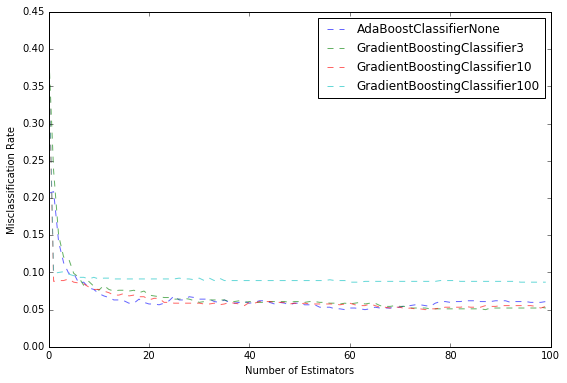

In [157]:
plt.figure(figsize=(9, 6))

model_arguments = {'n_estimators':100}
plot_iterations_vs_mse(AdaBoostClassifier, X_train,X_test, y_train, y_test, **model_arguments)
plot_iterations_vs_mse(GradientBoostingClassifier, X_train, X_test, y_train, y_test, **model_arguments)

model_arguments['max_depth'] = 10
plot_iterations_vs_mse(GradientBoostingClassifier, X_train, X_test, y_train, y_test, **model_arguments)

model_arguments['max_depth'] = 100
plot_iterations_vs_mse(GradientBoostingClassifier, X_train, X_test, y_train, y_test, **model_arguments)

plt.legend()
plt.show();

In [190]:
gboost_parameters = {'max_depth': [3, 10, None],
                     'learning_rate': [.01, .1],
                     'max_features': ['sqrt', 'log2'],
                     'n_estimators': [50, 100, 150],
                     'min_samples_leaf': [1, 2, 4],
                     'random_state': [1]}

gboost_gridsearch = GridSearchCV(GradientBoostingClassifier(),
                                 gboost_parameters,
                                 n_jobs=-1,
                                 verbose=True,
                                 scoring='accuracy')
gboost_gridsearch.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.6min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'learning_rate': [0.01, 0.1], 'min_samples_leaf': [1, 2, 4], 'n_estimators': [50, 100, 150], 'random_state': [1], 'max_features': ['sqrt', 'log2'], 'max_depth': [3, 10, None]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy',
       verbose=True)

In [191]:
gboost_gridsearch.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'n_estimators': 150,
 'random_state': 1}

In [192]:
gboost_gridsearch.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=10,
              max_features='log2', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=150, presort='auto', random_state=1,
              subsample=1.0, verbose=0, warm_start=False)

In [193]:
gboost_best = gboost_gridsearch.best_estimator_

In [194]:
y_hat = gboost_best.predict(X_test)

In [195]:
mse_gboostbest = mean_squared_error(y_hat, y_test)

In [196]:
mse_gboostbest

0.042345276872964167

In [197]:
r2_gboostbest = r2_score(y_hat, y_test)

In [198]:
r2_gboostbest

0.82249775150970061

### Feature importance & Partial Dependece Plots

In [244]:
feature_index = np.argsort(gboost_best.feature_importances_)[-10:]

feature_importance = pd.Series(gboost_best.feature_importances_, index=feature_names)
feature_importance = feature_importance.sort_values()

top10_features = feature_importance.sort_values(ascending=False)[:10]
top10_features

capital_run_length_average    0.090755
capital_run_length_total      0.089092
word_freq_you                 0.074663
capital_run_length_longest    0.068182
char_freq_!                   0.062617
word_freq_your                0.048179
word_freq_free                0.034953
char_freq_(                   0.033281
word_freq_will                0.030774
word_freq_our                 0.025584
dtype: float64

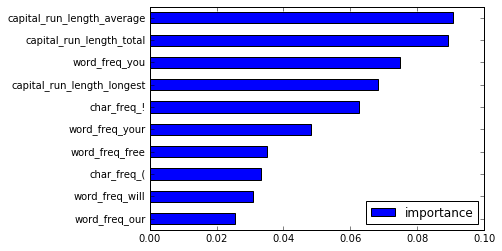

In [226]:
feature_score = pd.DataFrame({'importance': gboost_best.feature_importances_}, index=feature_names)
feature_score = feature_score.sort_values('importance')[-10:]
feature_score.plot(kind='barh');

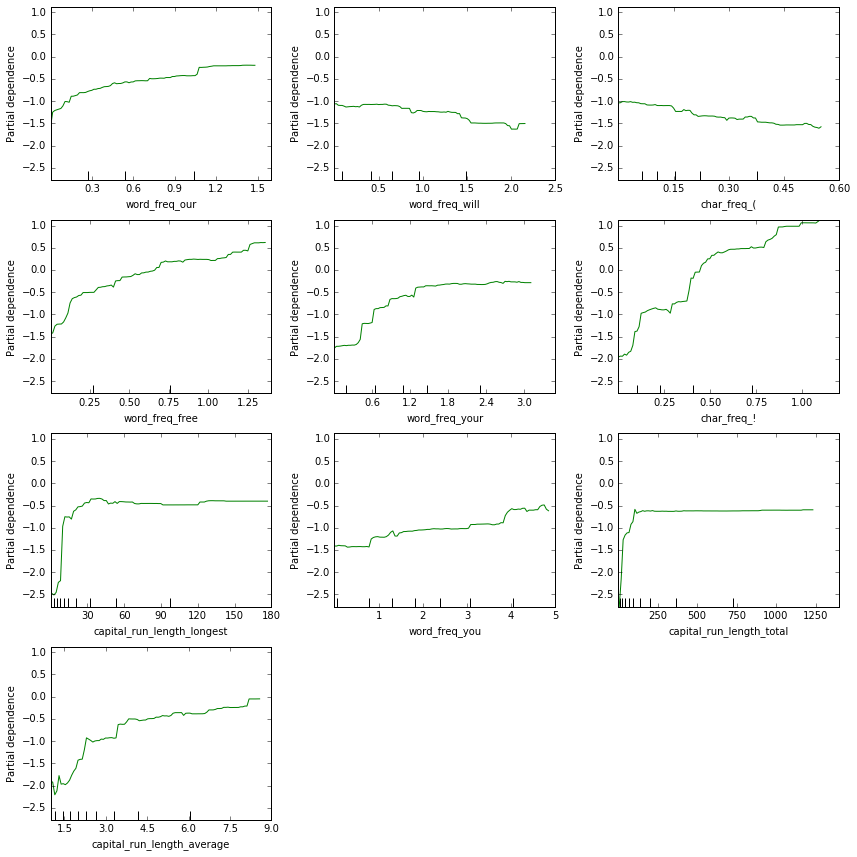

In [245]:
plot_partial_dependence(gboost_best, X_train, feature_index, feature_names=feature_names, figsize=(12, 12))
plt.tight_layout()
plt.show()

In [246]:
target_features = (feature_index[1], feature_index[-1])
target_features

(11, 54)

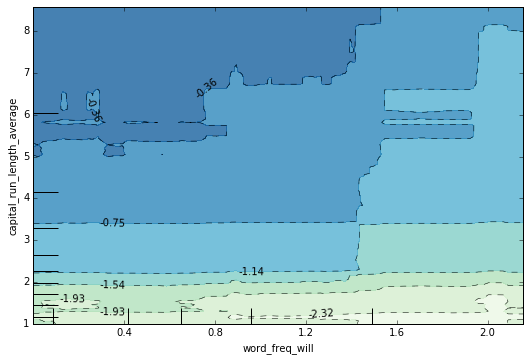

In [248]:
plot_partial_dependence(gboost_best, X_train, [target_features], 
                        feature_names=feature_names, 
                        contour_kw={'cmap':plt.cm.GnBu},
                        figsize=(8, 8))
plt.show()

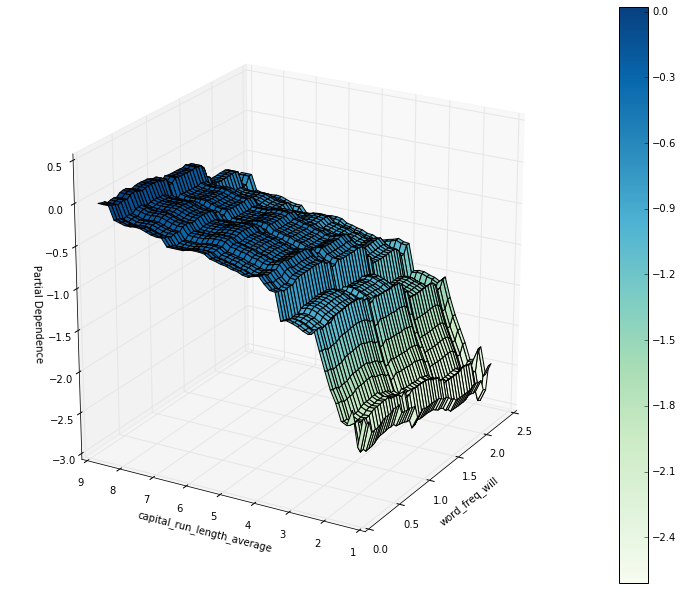

In [262]:
fig = plt.figure(figsize=(10, 8))
pdp, (x_axis, y_axis) = partial_dependence(gboost_best, target_features, X=X_train, grid_resolution=50)

XX, YY = np.meshgrid(x_axis, y_axis)
Z = pdp.T.reshape(XX.shape).T

ax = Axes3D(fig)

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.GnBu)

ax.set_xlabel(feature_names[target_features[0]])
ax.set_ylabel(feature_names[target_features[1]])
ax.set_zlabel('Partial Dependence')

ax.view_init(elev=22, azim=210)

plt.colorbar(surf)
plt.subplots_adjust(top=.8)
plt.show()

In [263]:
import plotly.plotly as py
from plotly.graph_objs import Surface, Data, Figure, Layout, Scene, XAxis, YAxis

trace1 = Surface(
    z=Z,  # link the fxy 2d numpy array
    x=x_axis,  # link 1d numpy array of x coords
    y=y_axis,   # link 1d numpy array of y coords
    colorscale=[[0,"rgb(8, 29, 88)"],
                [0.125,"rgb(37, 52, 148)"],
                [0.25,"rgb(34, 94, 168)"],
                [0.375,"rgb(29, 145, 192)"],
                [0.5,"rgb(65, 182, 196)"],
                [0.625,"rgb(127, 205, 187)"],
                [0.75,"rgb(199, 233, 180)"],
                [0.875,"rgb(237, 248, 217)"],
                [1,"rgb(255, 255, 217)"]],
    reversescale=True,
)

layout = Layout(
    title='Partial Dependence Between {} and {}'.format(feature_names[target_features[0]], feature_names[target_features[1]]), 
    # set plot title
    scene=Scene(  # (!) axes are part of a 'scene' in 3d plots
        xaxis=XAxis({"title":feature_names[target_features[0]],"type":"linear"}), # set x-axis style
        yaxis=YAxis({"title":feature_names[target_features[1]],"type":"linear"}), # set y-axis style
        #zaxis=ZAxis(axis)  # set z-axis style
    ),
    autosize=True
)

#layout = Layout({"scene":{"aspectratio":{"x":1,"y":1,"z":1},
#"xaxis":{"title":"x-axis","type":"linear"},
#"yaxis":{"title":"y-axis","type":"linear"},
#"zaxis":{"title":"z-axis"}},"height":635,"width":1188,"autosize":True})

# Package the trace dictionary into a data object
data = Data([trace1])

# Make a figure object
fig = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
py.iplot(fig, filename='partial_dependence')